In [13]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
import sys
import pandas as pd
from IPython.display import display  # For Jupyter notebooks
import matplotlib.pyplot as plt  
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
import sys


Processing: CCCCCCCCCCCCCCCCCCCC(O)=NC(CO[P]([O-])(=O)OCC[N+](C)(C)C)C(O)C=CCCCCCCCCCCCCC
Scaffold SMILES: 
Input SMILES: CCCCCCCCCCCCCCCCCCCC(O)=NC(CO[P]([O-])(=O)OCC[N+](C)(C)C)C(O)C=CCCCCCCCCCCCCC


Processing: CC(C)=CCCC(C)=CCCC(C)=CCc1c(C)c(c(O)cc1O)C2=C(C)C(=O)C(=C(CC=C(C)CCC=C(C)CCC=C(C)C)C2=O)O
Scaffold SMILES: O=C1C=CC(=O)C(c2ccccc2)=C1



ERROR: Generated scaffold contains no atoms


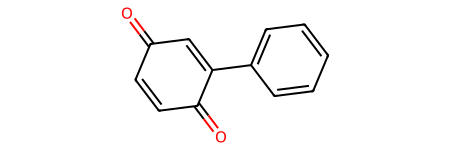


ERROR: Generated scaffold contains no atoms




Processing: CCCCCCCCCCCCCCCCCCCCCCC(=O)NC(CO[P]([O-])(=O)OCC[N+](C)(C)C)C(O)C=CCCCCCCCCC(C)CC
Scaffold SMILES: 
Input SMILES: CCCCCCCCCCCCCCCCCCCCCCC(=O)NC(CO[P]([O-])(=O)OCC[N+](C)(C)C)C(O)C=CCCCCCCCCC(C)CC


Processing: CC(=CC=CC=C(C)C=CC=C(C)C=Cc1c(C)cc(O)c(C)c1C)C=CC=C(C)C=Cc2c(C)ccc(C)c2C
Scaffold SMILES: C(=CC=CC=CC=CC=Cc1ccccc1)C=CC=CC=CC=Cc1ccccc1


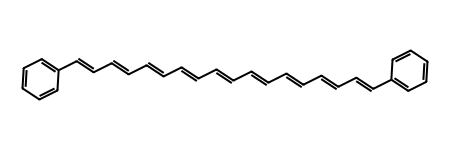



Processing: CC(C)=CCCC(C)=CCCC(C)=CCCC(CO)=CCCC(C)=CCCC(C)=CCCC(C)=CCCC(C)=CCc1cc(O[S](O)(=O)=O)ccc1O
Scaffold SMILES: c1ccccc1


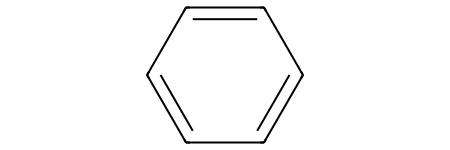

In [ ]:
def display_murcko_scaffold(smiles):
    """
    Display the Murcko scaffold from a SMILES string with comprehensive error handling.
    
    Args:
        smiles (str): SMILES string of the molecule
        
    Returns:
        str: Scaffold SMILES if successful, None otherwise
    """
    try:
        # 1. Validate and parse SMILES
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError("Failed to parse SMILES string - may be invalid")
            
        # 2. Generate Murcko scaffold
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        if scaffold is None:
            raise ValueError("Could not generate scaffold - molecule may be too simple")
            
        scaffold_smiles = Chem.MolToSmiles(scaffold)
        print(f"Scaffold SMILES: {scaffold_smiles}")
        
        # 3. Handle cases where scaffold has no atoms (unlikely but possible)
        if scaffold.GetNumAtoms() == 0:
            raise ValueError("Generated scaffold contains no atoms")
            
        # 4. Try multiple display methods with fallbacks
        try:
            # Method 1: Best for Jupyter - interactive display
            display(scaffold)
        except:
            try:
                # Method 2: RDKit's native drawing
                img = Draw.MolToImage(scaffold, size=(500, 500))
                plt.imshow(img)
                plt.axis('off')
                plt.title("Murcko Scaffold")
                plt.show()
            except Exception as draw_error:
                # Method 3: ASCII fallback
                print("\nCould not generate image display. ASCII representation:")
                print(Chem.MolToMolBlock(scaffold))
                print(f"\nDrawing error: {str(draw_error)}")
                
        return scaffold_smiles
        
    except Exception as e:
        print(f"\nERROR: {str(e)}", file=sys.stderr)
        print(f"Input SMILES: {smiles}")
        
        # For very simple molecules that can't form scaffolds
        if "too simple" in str(e).lower():
            print("This molecule doesn't contain a scaffold (no ring systems or linkers)")
            print("Original molecule:")
            try:
                display(mol) if 'mol' in locals() else print(Chem.MolToSmiles(Chem.MolFromSmiles(smiles)))
            except:
                print(smiles)
                
        return None

# Example usage with various test cases
if __name__ == "__main__":
    test_cases = [
        "",  # Caffeine (valid scaffold)
        "",                           # Ethanol (no scaffold)
        "",                # Invalid SMILES
        "CC(=CC=CC=C(C)C=CC=C(C)C=Cc1c(C)cc(O)c(C)c1C)C=CC=C(C)C=Cc2c(C)ccc(C)c2C",                   # Benzene (scaffold = itself)
        "CC(C)=CCCC(C)=CCCC(C)=CCCC(CO)=CCCC(C)=CCCC(C)=CCCC(C)=CCCC(C)=CCc1cc(O[S](O)(=O)=O)ccc1O"                              # Methane (no scaffold)
    ]
    
    for smiles in test_cases:
        print(f"\n{'='*50}")
        print(f"Processing: {smiles}")
        result = display_murcko_scaffold(smiles)
        print(f"{'='*50}\n")